# Do more flooded countries win more medals in swimming at the Olympic Games?

**Author:** Eloïse Delerue

**Date:** November 29th, 2023

## 1. Introduction

A country with a high GDP is likely to provide more infrastructures for its inhabitants, for instance swimming pools, but also to protect itself from natural disasters such as floods. In addition, these natural disasters can weaken a country, and direct its spending to priorities other than teaching its population to swim.

**Can GDP protect against flooding, and do GDP and flooding have an influence on the number of medals won in swimming at the Olympic Games?**

We anticipate that if this is the case, we should observe:
- ***Prediction 1:*** *a lower number of floods in countries with a high GDP.*
- ***Prediction 2:*** *a higher number of medals in swimming in countries with a high GDP and a low number of floods.*

## 2. Library Import

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 3. Data Import

In [67]:
df1 = pd.read_csv("naturalDisasters.csv")
df2 = pd.read_csv("olympic120years.csv")
df3 = pd.read_csv("countries_statistics.csv", sep = ";")

## 4. Data Manipulation

In [68]:
# Selecting data of interest for analysis
df1 = df1[df1['Disaster Type'] == 'Flood']
df2 = df2[df2['Sport'] == 'Swimming']

In [69]:
# Counting items by category
summary_table_1 = df1.groupby('Country')['Disaster Type'].agg(['count']).reset_index()
summary_table_2 = df2.groupby('Team')['Medal'].agg(['count']).reset_index()

# We have chosen to average GDP over the years
summary_table_3 = df3.groupby('Country')['GDP per capita'].agg(['mean']).reset_index()

In [70]:
# Editing category name for merging
summary_table_2 = summary_table_2.rename(columns={'Team': 'Country'})

# Merging tables based on Country
merged_table = pd.merge(summary_table_1, summary_table_2, on='Country', how='inner')
merged_table = merged_table.rename(columns={'count_x': 'Number of Floods'})
merged_table = merged_table.rename(columns={'count_y': 'Number of Medals'})

# Merging with summary_table_3
merged_table = pd.merge(merged_table, summary_table_3, on='Country', how='inner')
merged_table = merged_table.rename(columns={'mean': 'Mean GDP per capita'})

print(merged_table)

      Country  Number of Floods  Number of Medals  Mean GDP per capita
0     Albania                 8                 0          7741.126011
1     Algeria                15                 0         11624.188091
2      Angola                28                 0          5723.314264
3   Argentina                25                 3         15746.933371
4   Australia                19               401         36773.946609
..        ...               ...               ...                  ...
80    Tunisia                 6                 3          9154.130759
81    Ukraine                 5                 7          8007.242768
82    Uruguay                12                 0         14382.848502
83      Yemen                17                 0          3491.281170
84   Zimbabwe                 8                 7          2030.739929

[85 rows x 4 columns]


## 5. Data Description

c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

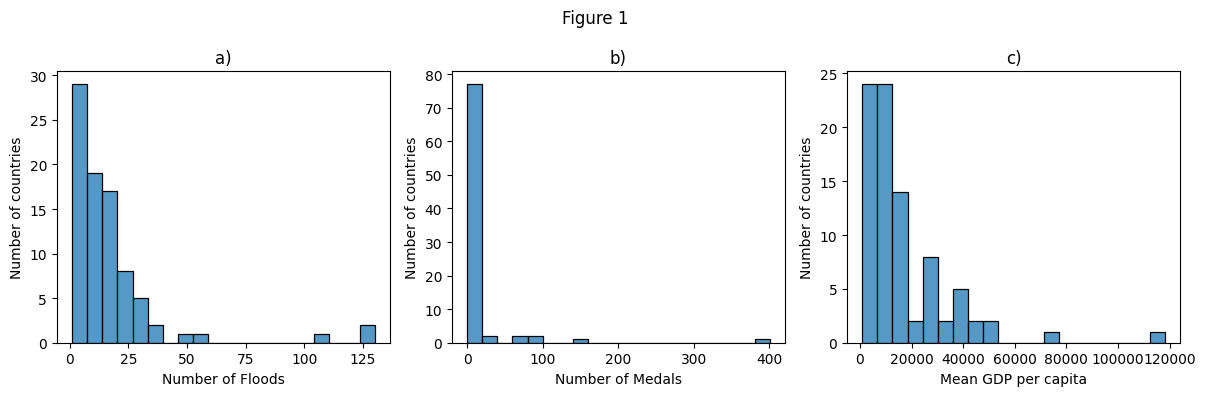

In [71]:
fig1 = plt.figure(figsize = (12, 4))
fig1.suptitle("Figure 1")

# Figure 1.a: Distribution of the number of floods
plt.subplot(1, 3, 1) 
sns.histplot(merged_table['Number of Floods'], bins=20)
plt.gca().set_xlabel("Number of Floods")
plt.gca().set_ylabel("Number of countries")
plt.title("a)")

# Figure 1.b: Distribution of the number of medals
plt.subplot(1, 3, 2) 
sns.histplot(merged_table['Number of Medals'], bins=20)
plt.gca().set_xlabel("Number of Medals")
plt.gca().set_ylabel("Number of countries")
plt.title("b)")

# Figure 1.c: Distribution of the importance of GDP
plt.subplot(1, 3, 3) 
sns.histplot(merged_table['Mean GDP per capita'], bins=20)
plt.gca().set_xlabel("Mean GDP per capita")
plt.gca().set_ylabel("Number of countries")
plt.title("c)")

plt.tight_layout()
plt.savefig('disaster_fig1.jpg') 
plt.show()

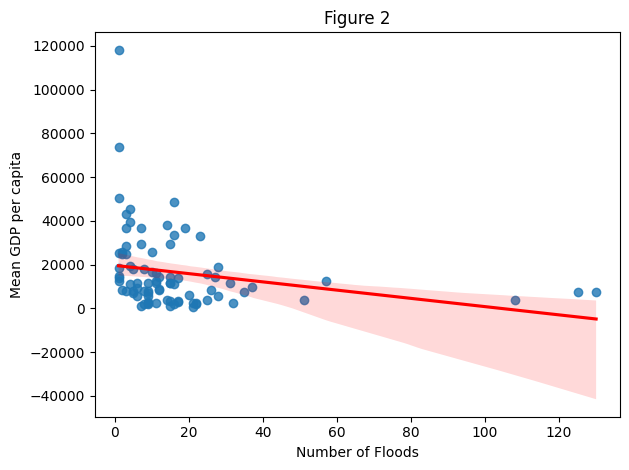

In [72]:
# Figure 2: Regplot of the number of floods depending on mean GDP per capita
sns.regplot(x=merged_table['Number of Floods'], y=merged_table['Mean GDP per capita'], line_kws = {"color": "red"})
plt.gca().set_xlabel("Number of Floods")
plt.gca().set_ylabel("Mean GDP per capita")
plt.title("Figure 2")

plt.tight_layout()
plt.savefig('disaster_fig2.jpg')
plt.show()

## 6. Data modelling

In [73]:
model = smf.ols(formula = 'Q("Number of Floods") ~ Q("Mean GDP per capita")', data = merged_table).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Number of Floods")   R-squared:                       0.058
Model:                               OLS   Adj. R-squared:                  0.047
Method:                    Least Squares   F-statistic:                     5.140
Date:                   Thu, 30 Nov 2023   Prob (F-statistic):             0.0260
Time:                           15:06:14   Log-Likelihood:                -383.48
No. Observations:                     85   AIC:                             771.0
Df Residuals:                         83   BIC:                             775.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   21.9398      3.301      6.647      0.000      15.375      28.505
Q("Mean GDP per capita")    -0.0003      0.000     -2.267      0.026      -0.001    -3.8e-05
==============================================================================
Omnibus:                       91.048   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              838.671
Skew:                           3.530   Prob(JB):                    7.67e-183
Kurtosis:                      16.673   Cond. No.                     3.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
model = smf.ols(formula = 'Q("Number of Medals") ~ Q("Number of Floods") + Q("Mean GDP per capita")', data = merged_table).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q("Number of Medals")   R-squared:                       0.056
Model:                               OLS   Adj. R-squared:                  0.033
Method:                    Least Squares   F-statistic:                     2.415
Date:                   Thu, 30 Nov 2023   Prob (F-statistic):             0.0957
Time:                           15:06:14   Log-Likelihood:                -448.47
No. Observations:                     85   AIC:                             902.9
Df Residuals:                         82   BIC:                             910.3
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.4122      8.831     -0.273      0.785     -19.980      15.155
Q("Number of Floods")        0.2544      0.237      1.072      0.287      -0.218       0.726
Q("Mean GDP per capita")     0.0006      0.000      2.120      0.037    3.98e-05       0.001
==============================================================================
Omnibus:                      145.191   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7456.549
Skew:                           6.126   Prob(JB):                         0.00
Kurtosis:                      47.218   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 7. Results

Countries with a high GDP are slightly less likely to suffer from floods than those with a low GDP ($\beta = -0.0003$, see **Figure 2.**). This is significant, however the model does not explain much of variation of the data ($R^2 = 0.058$, $p = 0.026$). Moreover, countries with a higher GDP win slightly more medals in swimming ($\beta = 0.0006$). This is also significant, but not explaining much of variation ($R^2 = 0.056$, $p = 0.037$). As for the relation between floods and medals, it is not significant ($p = 0.287$).

## 8. Conclusion

Our results indicate slight, but significant relationships between number of floods and GDP, and between number of medals and GDP. However, we cannot establish a relationship between number of floods and number of medals. It thus seems that a high GDP increases the number of medals at swimming in the Olympic Games, and reduces the risk of flooding.

It should be noted that this study is not causal. It could be that an unobserved factor causes the increase of number of floods: for example, being crossed by important rivers, or having a border with a sea or ocean. We also considered the number of floods, and not the number of casualties, nor the cost of the damage. As for the number of medals won, it also depends on the number of times the country participates in the Olympic Games.